## Projet Python data visualisation 

Modalité d’évaluation 
4 compétences évaluées 

Notation sur 20 :
Consignes 
- Votre analyse sous forme de Jupyter Notebook devra contenir
  - Au moins 1 diagramme avec données continues, type nuage de point ou histogramme
  - Au moins 2 diagramme avec des données discrètes
  - Au moins 3 graphiques avec des données catégoriques
  - 1 boîte à moustaches avec filtrage des données aberrantes sur le dataset (si il y en a)
  - 1 heat map avec matrice de corrélation (si pertinent)
  - Des commentaires clairs et pertinents pour chaque graphiques

dataset : kaggle / paperwithcode / google dataset research


# Compétence évaluée

1) Compréhension du sujet
    - choix de data pertinent + explication du sujet
    - Bien vulgariser le sujet
    - Problématique métier associé
    
2) Structure du Notebook :
    - Comment on répond aux questions données
    - Utilisé des graphiques intéressant au bonne endroit

3) La pertinence du projet :
    - Aspect Graphique (exemple date ilisible = sert à rien => caster des données) 
    - Données lisisble (filtrer données + expliquer comment on a filtré)
    - Pas de warning ou d'erreur ()
    
4) Présentation écrite des résultats
    - Faire des phrases : sujet - verbe - complément
        "Je rappel que ma prob c'était ca, j'avais ce jeu de données la .."
    - Pas juste dire 'je vois un écart type de 2 et une moyenne de 3'
    - Faire des hypothèses

# Import

On commence par importer les librairies nécessaires à notre projet d'étude de données.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('libs loaded')

libs loaded


# Initialisation

On initialise ensuite ce qui doit l'être

## Le thème de seaborn

In [2]:
sns.set_theme()

## Le dataset qui sera étudié sur ce notebook

In [3]:
dataset = pd.read_csv("./data/student-por.csv")
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


# Expression du sujet

## Description du jeu de données

On observe ici un jeu de données fournissant des informations sur des étudiants comprenant entre autre:
- L'école dans laquelle ils sont parmis 2
- Le sexe
- L'éducation et le travail des parents
- Les absences
- La note sur 20 par trimestre

## Problématique

### *Quels sont les paramètres affectant les notes d'un élève ?*

# Préparation des données au traitement

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Nous allons transformer toutes les valeurs booléennes qui sont sous la formes "yes"/"no" (voir ci-dessus) ou autres ("LE3"/"GE3" pour la taille de la famille) en valeurs chiffrées 1/0 pour les rendre étudiables

In [51]:
dataset.sex = dataset.sex.replace(to_replace=["M", "F"], value=[1, 0])
dataset.famsize = dataset.famsize.replace(to_replace=["LE3", "GT3"], value=[0, 1])
dataset.schoolsup = dataset.schoolsup.replace(to_replace=["yes", "no"], value=[1, 0])
dataset.famsup = dataset.famsup.replace(to_replace=["yes", "no"], value=[1, 0])
dataset.paid = dataset.paid.replace(to_replace=["yes", "no"], value=[1, 0])
dataset.activities = dataset.activities.replace(to_replace=["yes", "no"], value=[1, 0])
dataset.nursery = dataset.nursery.replace(to_replace=["yes", "no"], value=[1, 0])
dataset.higher = dataset.higher.replace(to_replace=["yes", "no"], value=[1, 0])
dataset.internet = dataset.internet.replace(to_replace=["yes", "no"], value=[1, 0])
dataset.romantic = dataset.romantic.replace(to_replace=["yes", "no"], value=[1, 0])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    int64 
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    int64 
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    int64 
 16  famsup      649 non-null    int64 
 17  paid        649 non-null    int64 
 18  activities  649 non-null    int64 
 19  nursery     649 non-null    int64 
 20  higher    

# Etudes

## HeatMap

<AxesSubplot:>

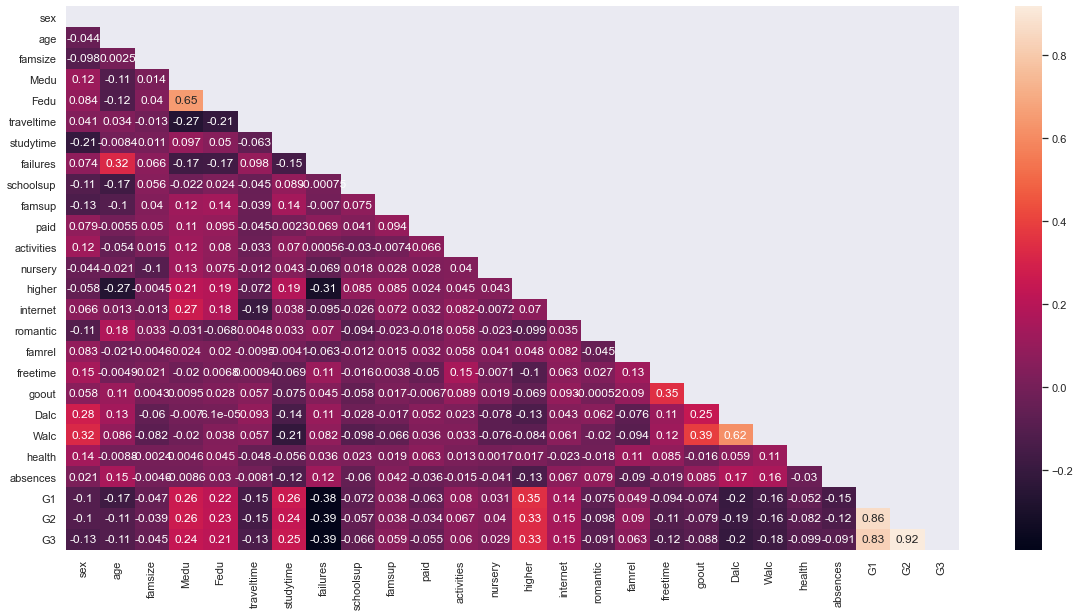

In [13]:
corr = dataset.corr()
# corr
mask = np.triu(np.ones_like(corr, dtype=bool))
# mask
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data=corr,mask=mask, annot=True, ax=ax)

La heatmap ci-dessus fait ressortir les corrélations entre chaque éléments quantifiable du jeu de données. L'élément que nous étudions sont les notes des élèves qui sont ici représentées par "G1", "G2" et "G3" qui sont respectivement les premier, deuxième et troisième trimestres. Il semblerait que plusieurs facteurs influent sur les notes que cela soit positivement ou négativement. On voit sur le graphique une forte corrélation entre ces champs de notes et le niveau d'éducation des parents ("Medu", "Fedu"), le temps consacré au travail ("studytime"), la volonté de faire des études supérieurs ("higher") et plus négativement par le nombre d'années redoublées ("failures").

### Etude des notes d'un trimestre à l'autre

<AxesSubplot:xlabel='G1', ylabel='G3'>

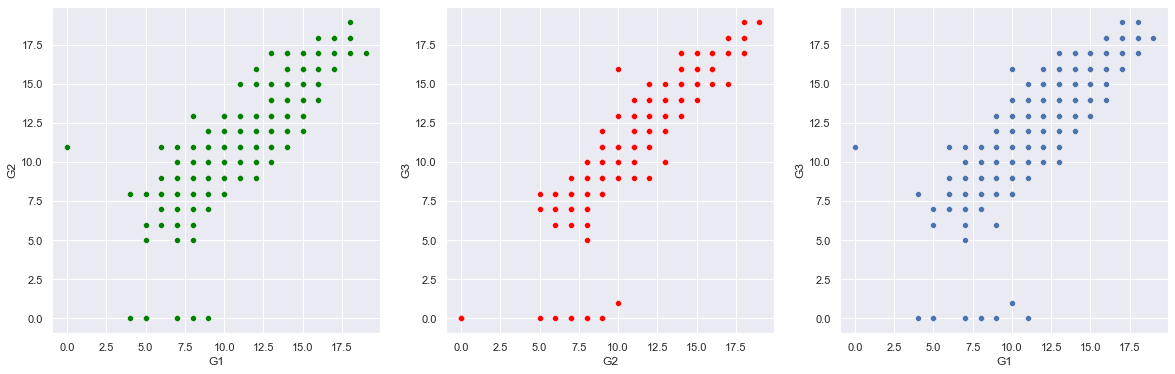

In [44]:
fig, ax =plt.subplots(1, 3, figsize=(20,6))
sns.scatterplot(data=dataset, x="G1", y="G2", ax=ax[0], color="green")
sns.scatterplot(data=dataset, x="G2", y="G3", ax=ax[1], color="red")
sns.scatterplot(data=dataset, x="G1", y="G3", ax=ax[2])

Nous comparons ici les notes entre les trimestres. On constate la présence de valeurs abhérentes que sont les quelques notes à 0 ou 1. Supprimons-les :

<AxesSubplot:xlabel='G1', ylabel='G3'>

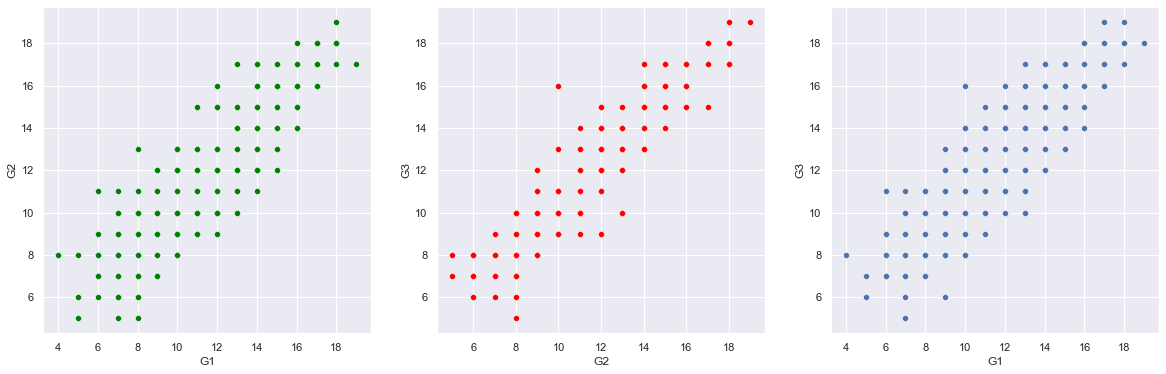

In [43]:
fig, ax =plt.subplots(1, 3, figsize=(20,6))
sns.scatterplot(data=dataset[(dataset["G1"] > 1) & (dataset["G2"] > 1)], x="G1", y="G2", ax=ax[0], color="green")
sns.scatterplot(data=dataset[(dataset["G2"] > 1) & (dataset["G3"] > 1)], x="G2", y="G3", ax=ax[1], color="red")
sns.scatterplot(data=dataset[(dataset["G1"] > 1) & (dataset["G3"] > 1)], x="G1", y="G3", ax=ax[2])

Une fois ces valeurs supprimées, il semble selon les notes restantes qu'il y ait une forte corrélation entre les notes obtenues à chaque trimestre avec une variance raisonnable au vu des valeurs possibles de 2 à 20. En clair, on peut supposer que si un élève à obtenu une bonne note à un trimestre, ses deux autres trimestres soient similaires et inversement en cas de mauvaise note. Cela peut s'expliquer par le fait que l'élève ne change pas vraiment d'un trimestre à l'autre. Ce ne sont donc pas les notes d'un trimestre qui influent mais plutôt l'élève en lui-même, alors nous ne considérerons pas cela comme paramètre affectant les notes. Pour la suite nous prendrons donc uniquement les notes du premier trimestre comme modèle pour les trois trimestres pour les études suivantes.

### Etude du nombre d'absences

<AxesSubplot:xlabel='absences', ylabel='G1'>

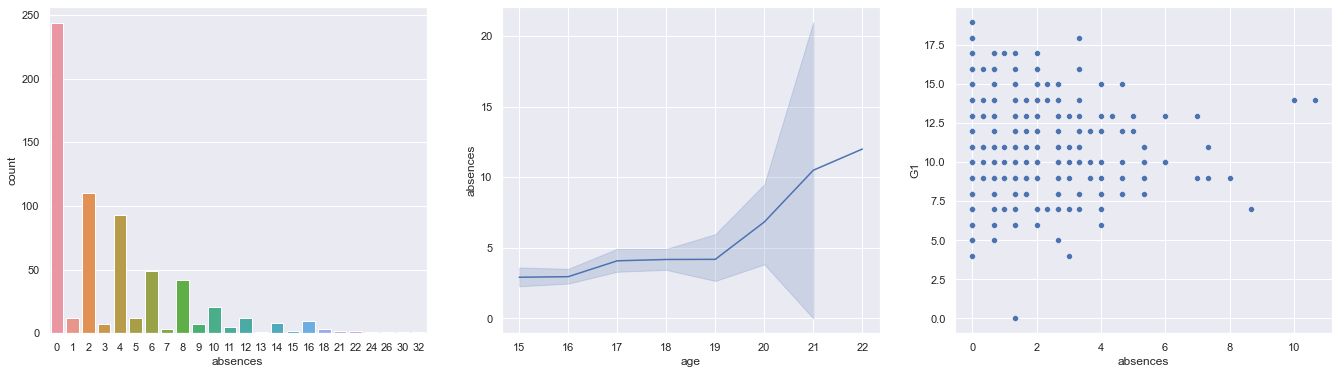

In [48]:
fig, ax =plt.subplots(1, 3, figsize=(23,6))
sns.countplot(data=dataset, x="absences", ax=ax[0])
sns.lineplot(data=dataset, x="age", y="absences", ax=ax[1])
sns.scatterplot(data=dataset, x=dataset["absences"]/3, y="G1", ax=ax[2])

In [42]:
dataset["absences"].describe()

count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

#### Schéma 1 : nombre d'absences

Nous étudions le nombre d'élèves par nombre d'absence. Nous pouvons voir qu'il y a peu d'élèves ayant beaucoup d'absences et que la majorité d'entre eux ont entre 0 et 2 absences. Cette information recoupe avec la médiane située à 2 absences. Cependant la heatmap montre une corrélation avec les notes de -0,15, supposant que les absences ont tout de même un impact négatif à prendre en compte même s'il est léger.

#### Schéma 2 : rapport entre l'âge et les absences

Nous étudions ici le rapport entre l'âge et le nombre d'absences. Il semblerait que plus l'élève est âgé plus il est susceptible d'être absent avec une hausse assez forte à partir des 19 ans. On observe tout de même une variance qui augmente avec les années. En effet, ayant moins d'élèves plus âgés et ceux-ci semblant avoir plus tendance à s'absenter, des valeurs abhérentes apparaissent plus rapidement

#### Schéma 3 : rapport les absences et les notes du premier trimestre

Nous étudions ici le rapport entre le nombre d'absences (divisé par trois pour simulé le nombre d'absences trimestriel) et les notes du premier trimestre. On observe une très lègère tendance négative comme le mentionnait la heatmap expliquant la corrélation entre les deux données.

### Etude de la profession des parents

<AxesSubplot:xlabel='G1', ylabel='Count'>

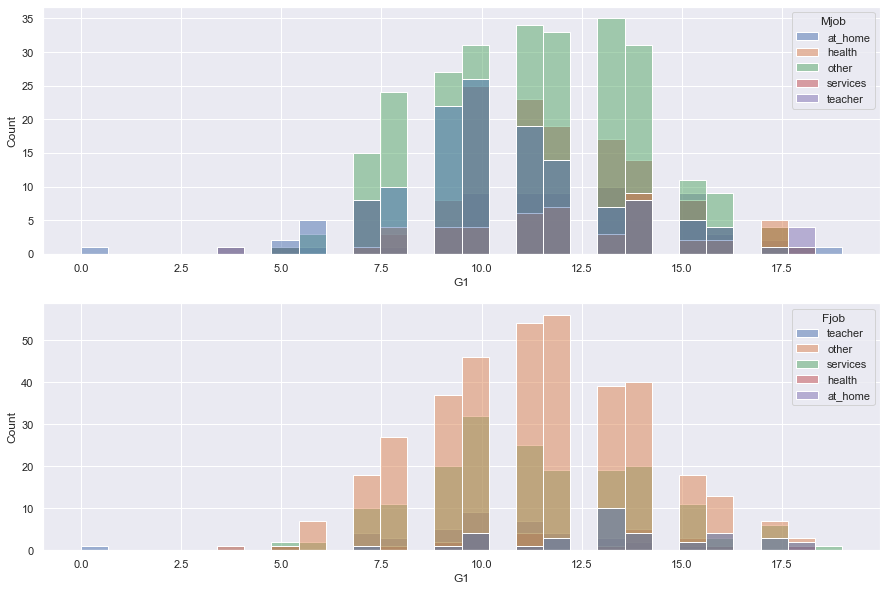

In [106]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.histplot(
    data=dataset,
    x="G1", 
    hue="Mjob",
    ax=ax[0]
)
sns.histplot(
    data=dataset,
    x="G1", 
    hue="Fjob",
    ax=ax[1]
)

#### Schéma 1 : nombre d'élève ayant une note n selon la profession de la mère

Nous étudions ici l'impact de la profession de la mère sur les notes de l'élève. Il semblerait que cette variable n'est que peu d'impact sur les notes à part éventuellement les notes au-dessus de 17 pour lesquelles la profession principale de la mère semble être l'enseignement.

#### Schéma 2 : nombre d'élève ayant une note n selon la profession du père

Nous étudions ici l'impact de la profession du père sur les notes de l'élève. Il semblerait que cette variable n'est que peu d'impact sur les notes.

Cependant, il y a une information qui doit ressortir de ces schémas. Dans les deux cas la catégorie "Other" est largement prédominante sous-entendant que la donnée n'est pas assez précise rendant de toutes manières celle-ci inexploitable.

### Etude du niveau d'éducation des parents

<AxesSubplot:xlabel='Fedu', ylabel='G1'>

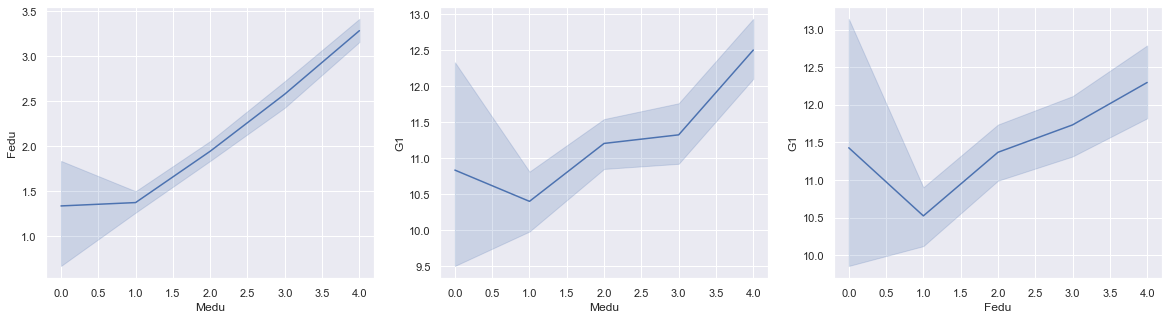

In [94]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.lineplot(data=dataset, x="Medu", y="Fedu", ax=ax[0])
sns.lineplot(data=dataset, x="Medu", y="G1", ax=ax[1])
sns.lineplot(data=dataset, x="Fedu", y="G1", ax=ax[2])

#### Schéma 1 : rapport entre les niveaux d'éducation des deux parents

Nous cherchons ici à mettre en évidence la corrélation entre le niveau d'éducation de chacun des parents afin d'ensuite étudier l'impact de ce niveau sur les notes de l'élève. Il semblerait que si un des parents à un niveau d'étude élevé il en sera de même pour le second avec une variance d'environ 0.1 sur une échelle de 1 à 4 rendant la donnée représentative.

#### Schéma 2 et 3 : rapport entre le niveau d'éducation des parents et les notes de l'élève

Nous étudions ici le rapport entre le niveau d'éducation des parents et les notes de l'élève afin de zoomer sur la corrélation mise en avant par la heatmap. On peut voir que le niveau de chaque parent influe fortement sur les notes de l'élève avec une variance respective d'environ 0.75 et 0.25 en excluant les valeurs inférieures à 1. La donnée est donc représentative.

### Etude de l'école

<AxesSubplot:xlabel='G1', ylabel='Count'>

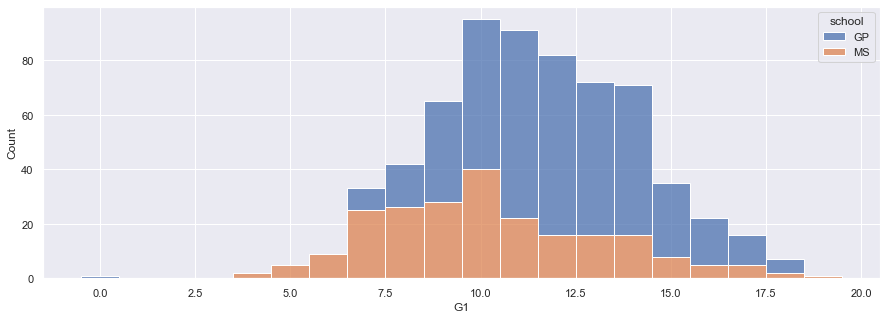

In [126]:
plt.subplots(figsize=(15,5))
sns.histplot(data=dataset, x="G1", hue="school", discrete=True, multiple="stack")

##### légende :
| Abreviation   | Signification |
| ------------- |:-------------:|
| GP   | Gabriel Pereira     |
| MS   | Mousinho da Silveira       |

Nous étudions ici le nombre d'élèves ayant une note n selon l'école dans laquelle il est parmis les 2 possibles. Il semblerait que l'on retrouve plus de notes hautes (10 et plus) pour les élèves scolarisés à Gabriel Pereira et plus la note monte plus la tendance se remarque. A l'inverse, on peut voir que, sauf une valeure abhérente à 0, en-dessous de 6 tous les élèves sont à Mousinho da Silveira.

### Etude du temps de travail par semaine

<AxesSubplot:xlabel='studytime', ylabel='G1'>

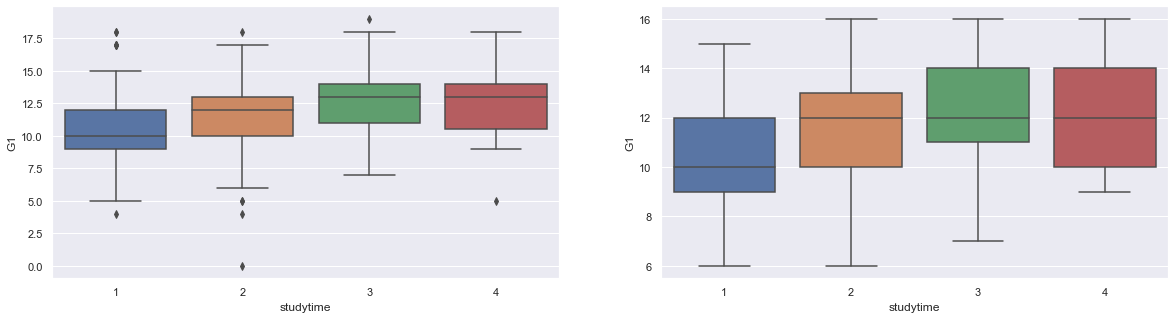

In [132]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data=dataset, x="studytime", y="G1", ax=ax[0])
sns.boxplot(data=dataset[(dataset["G1"] > 5) & (dataset["G1"] < 17)], x="studytime", y="G1", ax=ax[1])

Le premier schéma mettant en évidence des valeurs abhérentes, il a tout d'abord été filtré pour donner le second graphique, à droite qui ne conserve que les notes entre 5 et 17 tous 2 exclus. Sur ce dernier, on voit que plus la "note" du studytime est élevée plus la note augmente mais surtout la variance diminue. On peut penser que les notes des élèves dont le temps de travail hebdomadaire est plus haut sont plus homogènes.

### Etude du lieu de résidence

<AxesSubplot:xlabel='G1', ylabel='Count'>

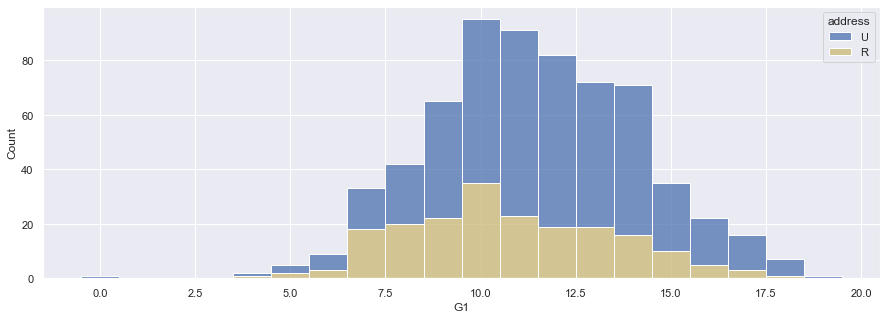

In [135]:
plt.subplots(figsize=(15,5))
sns.histplot(data=dataset, x="G1", hue="address", discrete=True, multiple="stack", palette=["b", "y"])

Nous étudions ici le nombre d'élèves ayant une note n en fonction de s'il réside en zone urbaine(U) ou en zone rurale(R). On peut déjà voir que le nombre d'élèves en zone urbaine est plus important que celui d'élèves en zone rurale. De plus, il semblerait que pour chaque note, la proportion d'élève de chaque zone soit similaire supposant donc que le lieu de résidence n'est qu'un facteur mineur.

### Etude du nombre d'années précédentes échouées

<AxesSubplot:xlabel='G1', ylabel='Count'>

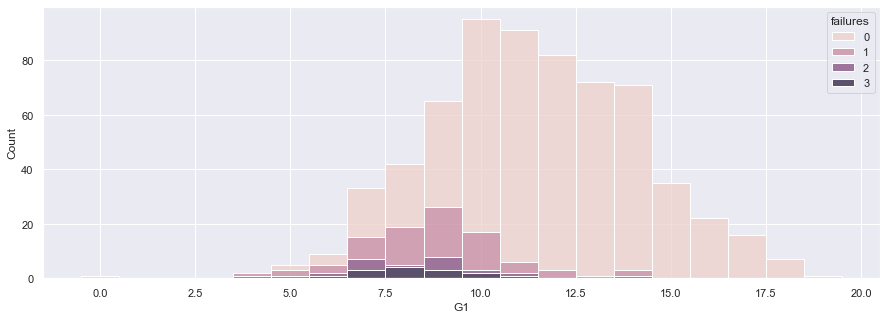

In [143]:
plt.subplots(figsize=(15,5))
sns.histplot(data=dataset, x="G1", hue="failures", discrete=True, multiple="stack")

Nous étudions ici le nombre d'élèves ayant une note n en fonction du nombre d'années précédentes échouées. On peut voir les élèves ayant déjà échoué une année scolaires se concentrent autour des notes plus basses et dans tous les cas ne montent pas au-dessus de 15. A l'inverse, il semblerait que les élèves n'ayant jamais redoublé ou raté d'année se concentre en majorité sur des notes supérieures à 8.

## Conclusion

Plusieurs facteurs semblent donc affecter les notes des élèves. Parmis les plus flagrants nous observons le nombre d'absences de l'élève, le niveau d'étude de ses parents ou encore le fait qu'il ait déjà raté une année. Cependant d'autres questions peuvent être soulevées par cette étude :
- *Quel facteur agit réellement sur l'autre avec l'étude des notes ?*
- *Quelles inégalités peuvent ressortir d'une telle étude ?*
- *Peut-on prédire les notes d'un élève à partir d'un questionnaire ?*